**Time Series Forecasting**

I want to predict what the demand for bike rentals would have been in 2020 if there had been no COVID-19 pandemic. So far we have found the best model Random Forest Regressor with 90% accuracy. Now I am using data from 2018 and 2019 to predict 2020.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
import glob

# Get a list of all CSV files in the directory
file_list = glob.glob('F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\*.csv')


# Create an empty list to hold the DataFrames
df_list = []

# Loop through the CSV files and read them into DataFrames
for file in file_list:
    # Check if the file name contains the years 2019, 2020, or 2021
    if  '2018' in file or '2019' in file or '2020' in file:
        # Read the CSV file into a DataFrame and rename the columns
        print(file)
        df = pd.read_csv(file)
        df = df.rename(columns={'ride_id': 'Ride ID', 'rideable_type': 'Rideable Type',
                                'started_at': 'Start date', 'ended_at': 'End date',
                                'start_station_name': 'Start station', 'start_station_id': 'Start station number',
                                'end_station_name': 'End station', 'end_station_id': 'End station number',
                                'start_lat': 'Start station latitude', 'start_lng': 'Start station longitude',
                                'end_lat': 'End station latitude', 'end_lng': 'End station longitude',
                                'Duration': 'Duration (seconds)', 'Bike number': 'Bike Number',
                                'member_casual': 'Member type'})
        #df = df[['Start date', 'End date', 'Member Type']]  # Select only the columns you need
        df_list.append(df)

# Concatenate the DataFrames
df = pd.concat(df_list, ignore_index=True)

F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201801_capitalbikeshare_tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201802-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201803-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201804-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201805-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201806-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201807-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201808-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201809-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201810-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201811-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201812-capitalbikeshare-tripdata.csv
F:\DataSciCAB\DataSci\Bike\Bike-DS\cov19\201901-capitalbikeshare

step 1: prepare the data 

In [8]:
df.shape

(9158015, 15)

In [9]:
#to check for duplicated values 
duplicated_mask = df.duplicated(keep= 'first')
duplicated_rows = df[duplicated_mask]
duplicated_rows

,Duration (seconds),Start date,End date,Start station number,Start station,End station number,End station,Bike Number,Member type,Ride ID,Rideable Type,Start station latitude,Start station longitude,End station latitude,End station longitude
3383831,790.0,2018-12-01 00:00:44,2018-12-01 00:13:54,31203.0,14th & Rhode Island Ave NW,31116.0,California St & Florida Ave NW,W21477,Member,NaN,NaN,NaN,NaN,NaN,NaN
3383832,771.0,2018-12-01 00:00:55,2018-12-01 00:13:46,31203.0,14th & Rhode Island Ave NW,31116.0,California St & Florida Ave NW,W22810,Member,NaN,NaN,NaN,NaN,NaN,NaN
3383833,775.0,2018-12-01 00:00:55,2018-12-01 00:13:51,31203.0,14th & Rhode Island Ave NW,31116.0,California St & Florida Ave NW,W21144,Member,NaN,NaN,NaN,NaN,NaN,NaN
3383834,750.0,2018-12-01 00:01:08,2018-12-01 00:13:39,31203.0,14th & Rhode Island Ave NW,31116.0,California St & Florida Ave NW,W23321,Member,NaN,NaN,NaN,NaN,NaN,NaN
3383835,146.0,2018-12-01 00:02:45,2018-12-01 00:05:11,31124.0,14th & Irving St NW,31102.0,11th & Kenyon St NW,W22304,Member,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3402545,434.0,2018-12-04 10:24:35,2018-12-04 10:31:50,31638.0,1st & H St NW,31603.0,1st & M St NE,W23394,Member,NaN,NaN,NaN,NaN,NaN,NaN
3402547,412.0,2018-12-04 10:24:54,2018-12-04 10:31:46,31638.0,1st & H St NW,31603.0,1st & M St NE,W21044,Member,NaN,NaN,NaN,NaN,NaN,NaN
3402548,461.0,2018-12-04 10:24:56,2018-12-04 10:32:38,31282.0,16th & R St NW,31117.0,15th & Euclid St NW,E00144,Member,NaN,NaN,NaN,NaN,NaN,NaN
3402549,129.0,2018-12-04 10:24:57,2018-12-04 10:27:07,31415.0,Georgia Ave & Kennedy St NW,31407.0,14th St & Colorado Ave NW,W01220,Member,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#we have 18441 duplicated rows so to get unique rows we can drop them
df = df.drop_duplicates(keep='first')

In [11]:
#I am chosing these two features to go with them in machine learning step 
df = df[['Start date', 'Member type']]

In [12]:
df.head()

,Start date,Member type
0,2018-01-01 00:05:06,Member
1,2018-01-01 00:14:30,Casual
2,2018-01-01 00:14:53,Casual
3,2018-01-01 00:15:31,Casual
4,2018-01-01 00:18:02,Member


In [13]:
#rename columns in bikes ds
for col in df.columns:
    df.rename(columns={col:col.lower().replace(" ","_")},inplace=True)

df.head(0)

,start_date,member_type


In [14]:
df.head()

,start_date,member_type
0,2018-01-01 00:05:06,Member
1,2018-01-01 00:14:30,Casual
2,2018-01-01 00:14:53,Casual
3,2018-01-01 00:15:31,Casual
4,2018-01-01 00:18:02,Member


In [15]:
#to convert the type from object to datetime
df['start_date'] = pd.to_datetime(df['start_date'])
df.head()

,start_date,member_type
0,2018-01-01 00:05:06,Member
1,2018-01-01 00:14:30,Casual
2,2018-01-01 00:14:53,Casual
3,2018-01-01 00:15:31,Casual
4,2018-01-01 00:18:02,Member


In [16]:
#some of values in this column are with capital letter started and some are with lower letter to fix it  
df['member_type'] = df['member_type'].replace({'Member': 'member', 'Casual': 'casual'})

In [17]:
#to get the total number of rides per day I am going to use member type 
casual = df[df['member_type'] == 'casual'].groupby(pd.Grouper(key = 'start_date', freq = 'MS')).count().rename(columns={'member_type': 'casual_cnt'}).reset_index()
casual = casual[['start_date', "casual_cnt"]]
casual.head()

,start_date,casual_cnt
0,2018-01-01,16999
1,2018-02-01,21833
2,2018-03-01,54219
3,2018-04-01,89602
4,2018-05-01,102303


In [18]:
#to get the total number of rides per day I am going to use member type 
member = df[df['member_type'] == 'member'].groupby(pd.Grouper(key = 'start_date', freq = 'MS')).count().rename(columns={'member_type': 'member_cnt'}).reset_index()
member = member[['start_date', 'member_cnt']]
member.head()

,start_date,member_cnt
0,2018-01-01,151591
1,2018-02-01,160545
2,2018-03-01,184779
3,2018-04-01,239305
4,2018-05-01,271812


In [19]:
# to join these two new datasets 
df= pd.merge(member,casual, how='outer', on = "start_date")
df.head()

,start_date,member_cnt,casual_cnt
0,2018-01-01,151591,16999
1,2018-02-01,160545,21833
2,2018-03-01,184779,54219
3,2018-04-01,239305,89602
4,2018-05-01,271812,102303


In [20]:
#to get the total count
df = df.assign(total = df['member_cnt'] + df['casual_cnt'])
df.head()

,start_date,member_cnt,casual_cnt,total
0,2018-01-01,151591,16999,168590
1,2018-02-01,160545,21833,182378
2,2018-03-01,184779,54219,238998
3,2018-04-01,239305,89602,328907
4,2018-05-01,271812,102303,374115


In [21]:
# Check for non-numeric columns
for col in df.columns:
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f"{col} is not numeric")

start_date is not numeric


In [22]:
#have to convert each column to numeric values 
df['year'] = df['start_date'].dt.year
df['quarter'] = df['start_date'].dt.quarter
df['month'] = df['start_date'].dt.month
df['day'] = df['start_date'].dt.day
df['day_of_week'] = df['start_date'].dt.dayofweek
df["weekend"] = df['day_of_week'] > 4
df["weekend"] = df["weekend"].astype(int)

In [23]:
# Check for non-numeric columns
for col in df.columns:
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f"{col} is not numeric")

start_date is not numeric


In [24]:
df.head(7)

,start_date,member_cnt,casual_cnt,total,year,quarter,month,day,day_of_week,weekend
0,2018-01-01,151591,16999,168590,2018,1,1,1,0,0
1,2018-02-01,160545,21833,182378,2018,1,2,1,3,0
2,2018-03-01,184779,54219,238998,2018,1,3,1,3,0
3,2018-04-01,239305,89602,328907,2018,2,4,1,6,1
4,2018-05-01,271812,102303,374115,2018,2,5,1,1,0
5,2018-06-01,289323,103015,392338,2018,2,6,1,4,0
6,2018-07-01,293289,111472,404761,2018,3,7,1,6,1


In [25]:
df.tail()

,start_date,member_cnt,casual_cnt,total,year,quarter,month,day,day_of_week,weekend
31,2020-08-01,123885,127718,251603,2020,3,8,1,5,1
32,2020-09-01,132444,117455,249899,2020,3,9,1,1,0
33,2020-10-01,130216,99616,229832,2020,4,10,1,3,0
34,2020-11-01,101504,73931,175435,2020,4,11,1,6,1
35,2020-12-01,69675,36154,105829,2020,4,12,1,1,0


In [26]:
#we don't need start_date column anymore 
df = df[['year', 'quarter', 'month', 'day_of_week', 'weekend', 'total' ]]
df.head()

,year,quarter,month,day_of_week,weekend,total
0,2018,1,1,0,0,168590
1,2018,1,2,3,0,182378
2,2018,1,3,3,0,238998
3,2018,2,4,6,1,328907
4,2018,2,5,1,0,374115


In [27]:
#to get seasons from months 

#a function to map month numbers to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 1
    elif month in [3, 4, 5]:
        return 2
    elif month in [6, 7, 8]:
        return 3
    else:
        return 4

# Create a new categorical column called "seasons"
df['season'] = df['month'].apply(get_season).astype(int)

In [28]:
df.head()

,year,quarter,month,day_of_week,weekend,total,season
0,2018,1,1,0,0,168590,1
1,2018,1,2,3,0,182378,1
2,2018,1,3,3,0,238998,2
3,2018,2,4,6,1,328907,2
4,2018,2,5,1,0,374115,2


In [29]:
df.tail()

,year,quarter,month,day_of_week,weekend,total,season
31,2020,3,8,5,1,251603,3
32,2020,3,9,1,0,249899,4
33,2020,4,10,3,0,229832,4
34,2020,4,11,6,1,175435,4
35,2020,4,12,1,0,105829,1


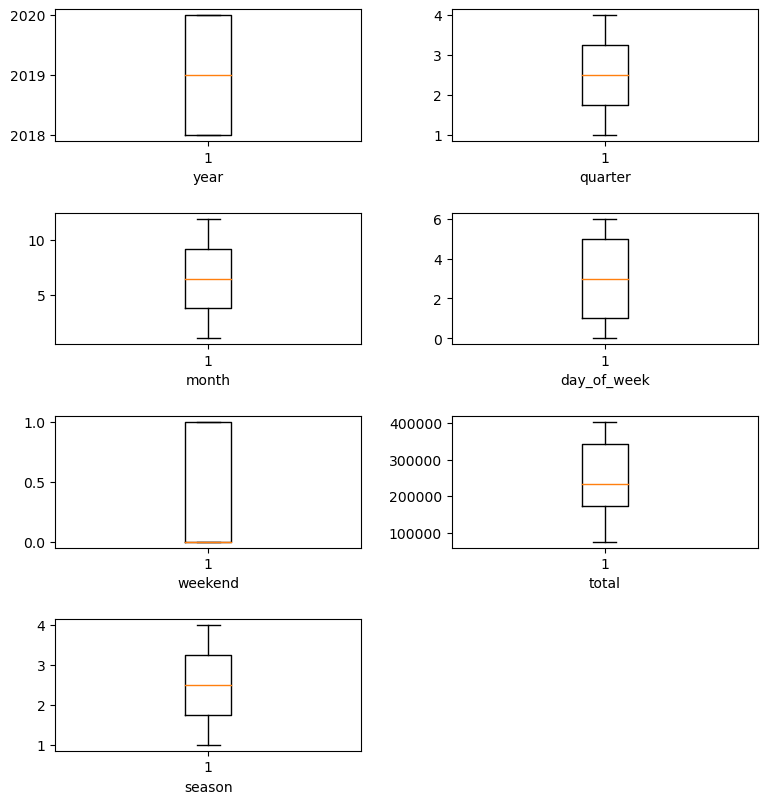

In [30]:
#to check for outliers 

fig = plt.figure(figsize=(12,10))
count = 0
for i in range(4):
    for j in range(2):
        if count == 7:
            break
        plt.subplot2grid((5,3),(i,j))
        plt.boxplot(df[df.columns[count]])
        plt.xlabel(df.columns[count])
        plt.tight_layout(pad=2)
        count += 1


In [31]:
#we have outlier on the total column, to remove them
def outliers_idr(df):
    
    num=df.count(axis=1)
    num_col=num[1]
    
    i=0
    for colu in df:
        if (colu =='total'):
            mean_df=df[colu].mean()
            std_df=df[colu].std()
            df_out= df[(df[colu] <= 3*std_df+mean_df) & (df[colu] >= (mean_df-3*std_df))]
            df=df_out
            i=i+1
        
    return df_out

df_r= outliers_idr(df)
df_r

,year,quarter,month,day_of_week,weekend,total,season
0,2018,1,1,0,0,168590,1
1,2018,1,2,3,0,182378,1
2,2018,1,3,3,0,238998,2
3,2018,2,4,6,1,328907,2
4,2018,2,5,1,0,374115,2
5,2018,2,6,4,0,392338,3
6,2018,3,7,6,1,404761,3
7,2018,3,8,2,0,403866,3
8,2018,3,9,5,1,325800,4
9,2018,4,10,0,0,343021,4


C:\Users\Fariha\AppData\Local\Temp\ipykernel_13504\3058146780.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cor, dtype=np.bool))


<AxesSubplot:>

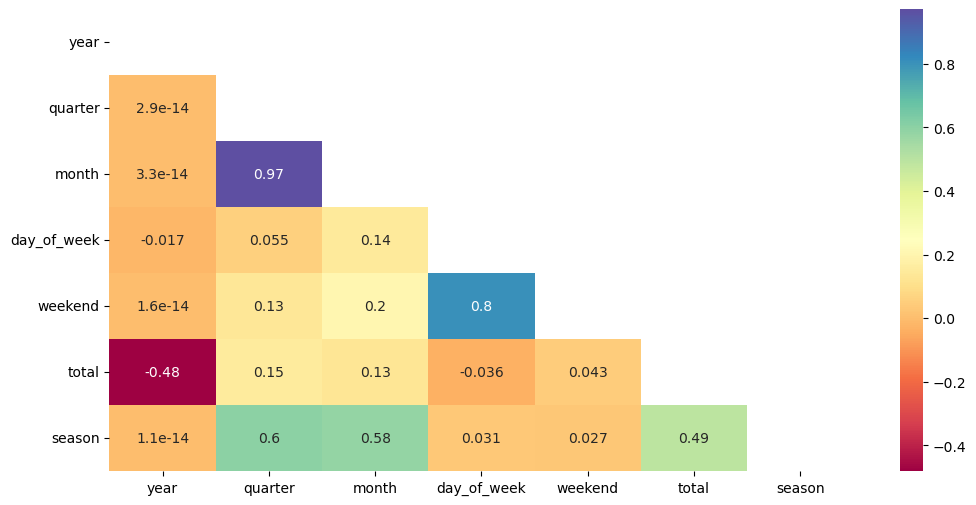

In [32]:
#check for high correlations 
cor=df.corr()
mask = np.triu(np.ones_like(cor, dtype=np.bool))
fig=plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Spectral', mask=mask , annot=True)

there is a high correlation between quarter and month 

In [33]:
#to get the final 
df = df[['year', 'season', 'month', 'total' ]]
df.head()

,year,season,month,total
0,2018,1,1,168590
1,2018,1,2,182378
2,2018,2,3,238998
3,2018,2,4,328907
4,2018,2,5,374115


step 2: machine learning 

I am using data from 2018 to 2019 as training data and data from 2020 as testing data. 
This will allow us to train the model on data from before the pandemic and test it on data from the year when the pandemic occurred and to get the prediction which is what we want to get. 

In [40]:
# Split the data into training and testing sets based on the year
train_data = df.loc[df['year'] < 2020]
test_data = df.loc[df['year'] == 2020]

# Verify the shape of the training and testing sets
print('Training set shape:', train_data.shape)
print('Testing set shape:', test_data.shape)

Training set shape: (24, 4)
Testing set shape: (12, 4)


In [41]:
# Define the features and target variable for the linear regression model
X_train = train_data.drop(['total'], axis=1)
y_train = train_data['total']
X_test = test_data.drop(['total'], axis=1)
y_test = test_data['total']

In [36]:
#check the distribution of the target variable using a histogram

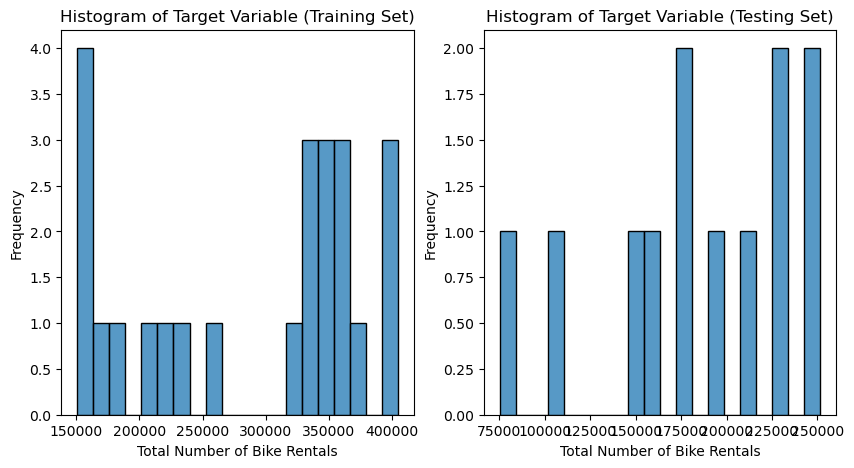

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms of the target variable in the training and testing sets side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(y_train, bins=20, ax=axs[0])
axs[0].set_title('Histogram of Target Variable (Training Set)')
axs[0].set_xlabel('Total Number of Bike Rentals')
axs[0].set_ylabel('Frequency')

sns.histplot(y_test, bins=20, ax=axs[1])
axs[1].set_title('Histogram of Target Variable (Testing Set)')
axs[1].set_xlabel('Total Number of Bike Rentals')
axs[1].set_ylabel('Frequency')

plt.show()



In [43]:
# min-max scaling, which scales the features to a fixed range (usually between 0 and 1)
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Scale the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


3. Random Forest Model

In [46]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a Random Forest Regression model
rf_model = RandomForestRegressor()

# train the model
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Calculate the Mean Squared Error on the testing set
rf_mse = mean_squared_error(y_test, y_pred)
print("Random Forest Regression Testing MSE: ", rf_mse)
# evaluate with r2_score
Accuracy = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %Accuracy)

Random Forest Regression Testing MSE:  16153569831.24398
Accuracy of the model is -474.75


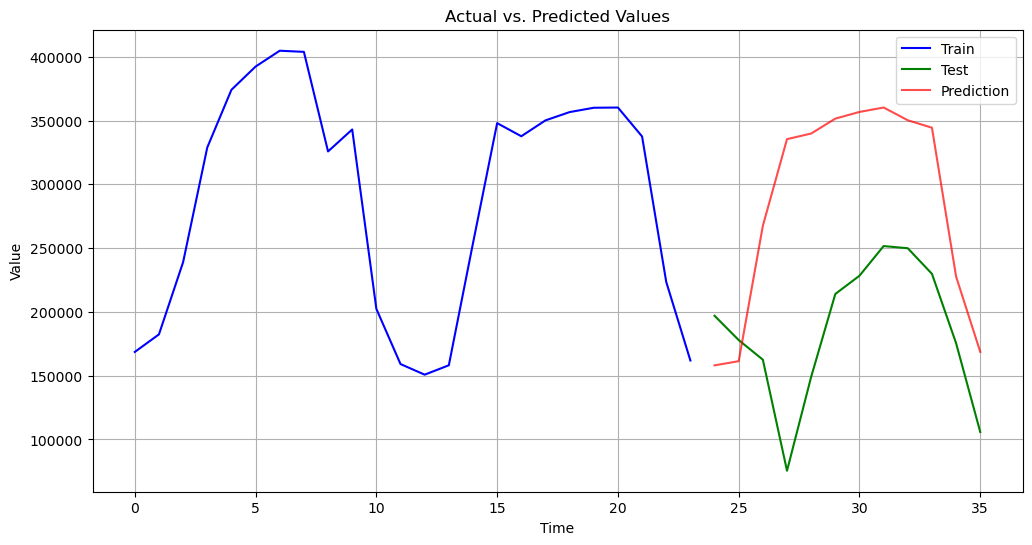

In [49]:
fig, ax = plt.subplots(figsize=(12, 6))

# Create a DataFrame for the predicted values
y_pred_df = pd.DataFrame({'Prediction': y_pred}, index=y_test.index)

# Plot the training, testing, and predicted values
y_train.plot(ax=ax, label='Train', color='blue')
y_test.plot(ax=ax, label='Test', color='green')
y_pred_df.plot(ax=ax, label='Predictions', color='red', alpha=0.7)

# Add a title and axis labels
ax.set_title('Actual vs. Predicted Values')
ax.set_xlabel('Time')
ax.set_ylabel('Value')

# Add grid lines
ax.grid(True)

# Add a legend
ax.legend()

plt.show()


Result: above graph shows the demand for bike rentals using Random Forest Regressor with 90% accuracy if there was no covid pandemic.

In [62]:
df = pd.concat([test_data, y_pred_df], axis=1)

df

,year,season,month,total,Prediction
24,2020,1,1,196969,158086.36
25,2020,1,2,177901,161345.68
26,2020,2,3,162530,267509.78
27,2020,2,4,75471,335427.79
28,2020,2,5,149051,339837.50
29,2020,3,6,214047,351519.12
30,2020,3,7,228347,356760.56
31,2020,3,8,251603,360238.29
32,2020,4,9,249899,350232.41
33,2020,4,10,229832,344401.59


In [64]:
df.rename(columns={'total': 'real values'}, inplace=True)
df

,year,season,month,Real values,Prediction
24,2020,1,1,196969,158086.36
25,2020,1,2,177901,161345.68
26,2020,2,3,162530,267509.78
27,2020,2,4,75471,335427.79
28,2020,2,5,149051,339837.50
29,2020,3,6,214047,351519.12
30,2020,3,7,228347,356760.56
31,2020,3,8,251603,360238.29
32,2020,4,9,249899,350232.41
33,2020,4,10,229832,344401.59


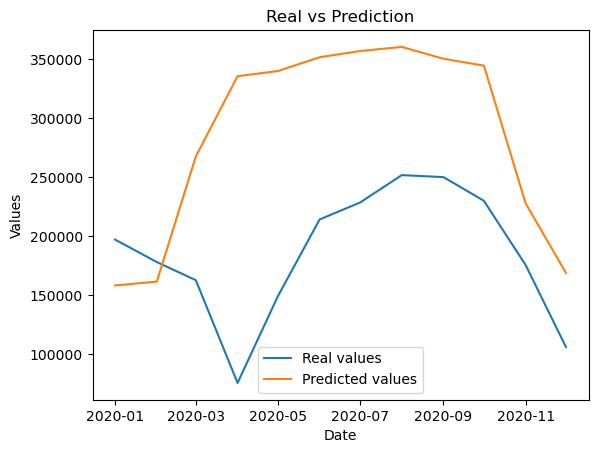

In [73]:
import matplotlib.pyplot as plt


# Combine year, season, and month columns into a single datetime column
df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))

# Create a line plot of the Real values and Prediction columns against the date column
plt.plot(df['date'], df['Real values'], label='Real values')
plt.plot(df['date'], df['Prediction'], label='Predicted values')

# Add a title and labels to the plot
plt.title('Real vs Prediction')
plt.xlabel('Date')
plt.ylabel('Values')

# Add a legend to the plot
plt.legend()


# Display the plot
plt.show()


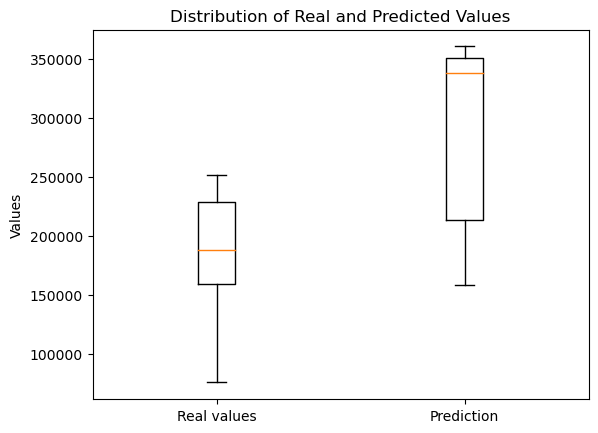

In [67]:
plt.boxplot([df['Real values'], df['Prediction']], labels=['Real values', 'Prediction'])

plt.title('Distribution of Real and Predicted Values')
plt.ylabel('Values')

plt.show()


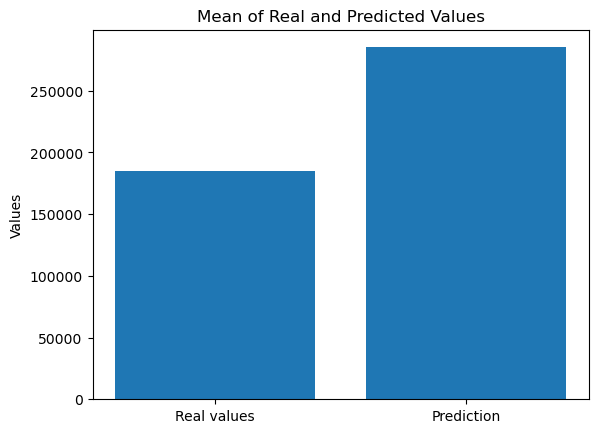

In [72]:
plt.bar(['Real values', 'Prediction'], [df['Real values'].mean(), df['Prediction'].mean()])

plt.title('Mean of Real and Predicted Values')
plt.ylabel('Values')

plt.show()
